In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Function to multiply columns by values from the 10th row
def multiply_columns(df, column_names):
    for column in column_names:
        df[column] = df[column].apply(lambda x: x * df.iloc[10][column] if isinstance(x, float) else x)
    return df


In [3]:
# Load data
contents_df = pd.read_csv("Datasets/Contents.csv")
emissions_df = pd.read_csv("Datasets/food emissions.csv")


In [4]:
# Data cleaning and filtering
selected_food_products = ['Rice', 'Wheat', 'Beef', 'Chicken', 'Prawns', 'Vegetables', 'Onion', 'Potato', 'Tomato', 'Cheese', 'Oil', 'Beans', 'Pork', 'Fish', 'Eggs', 'Radish', 'Olive Oil']
filtered_emissions_df = emissions_df.loc[emissions_df['Food product'].isin(selected_food_products)]


In [5]:
# Data manipulation
selected_columns = ['Food product', 'Total Global Average GHG Emissions per kg']
new_emissions_df = filtered_emissions_df[selected_columns]


In [6]:
# Data integration
contents_df.loc[len(contents_df)] = ["Total Global Average GHG Emissions per kg", "", "", "1.79", "99.48", "23.88", "9.87", "4.67", "13.63", "3.60", "5.42", "0.50", "12.31", "0.46", "26.87", "0.43", "4.45", "2.09", "0.53", "1.57"]


In [7]:
# Data transformation
cleaned_contents_df = contents_df.fillna(0)
cleaned_contents_df.to_csv("Datasets/New.csv")


In [8]:
# Further data transformation
updated_contents_df = multiply_columns(pd.read_csv("Datasets/New.csv"), selected_food_products)


In [9]:
# Save the final DataFrame
updated_contents_df.to_csv("Datasets/Final_ready.csv")


In [10]:
# Data analysis and visualization
selected_columns_for_plot = ['Rice', 'Wheat', 'Chicken', 'Prawns', 'Vegetables', 'Onion', 'Potato', 'Tomato', 'Cheese', 'Oil', 'Beans', 'Pork', 'Olive Oil', 'Fish', 'Eggs', 'Radish', 'Beef']
final_df = pd.read_csv("Datasets/Final_ready.csv").drop(10)


In [11]:
# Remove ingredients with a quantity of 0 from the pie chart
selected_columns_for_plot = [col for col in selected_columns_for_plot if final_df[col].sum() > 0]

summed_values = final_df[selected_columns_for_plot].sum(axis=1)


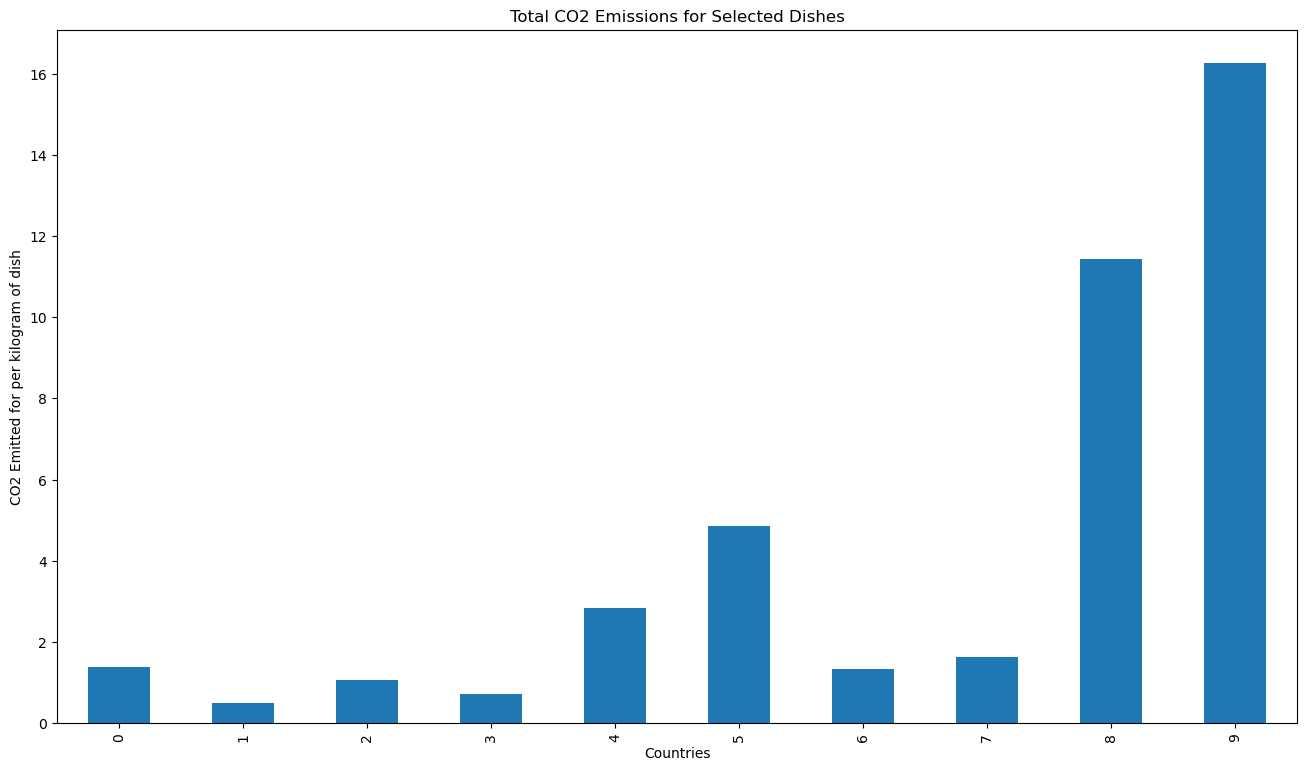

In [12]:
# Bar plot
summed_values.plot(kind="bar", figsize=(16, 9))
plt.xlabel("Countries")
plt.ylabel("CO2 Emitted for per kilogram of dish")
plt.title("Total CO2 Emissions for Selected Dishes")
plt.show()


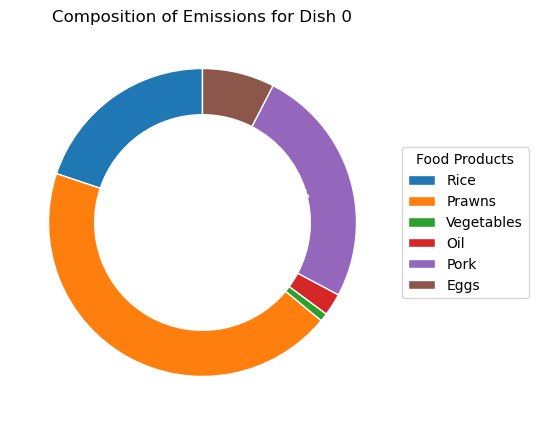

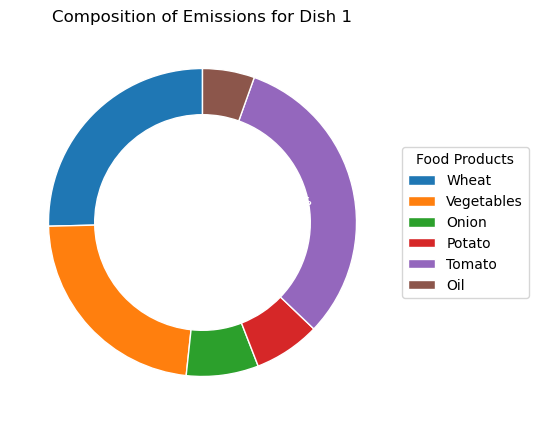

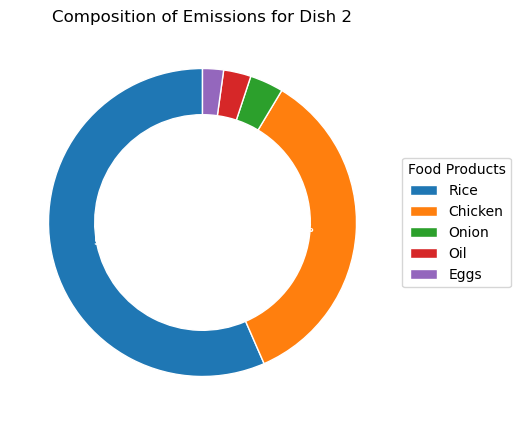

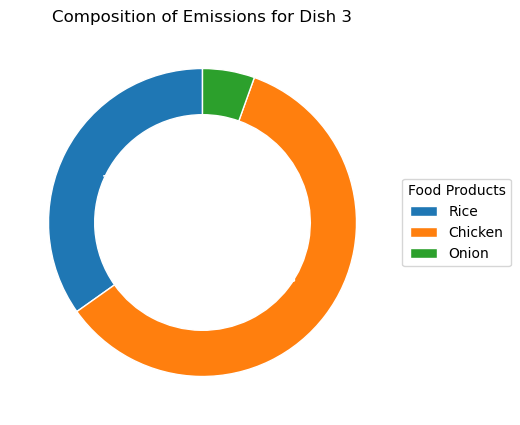

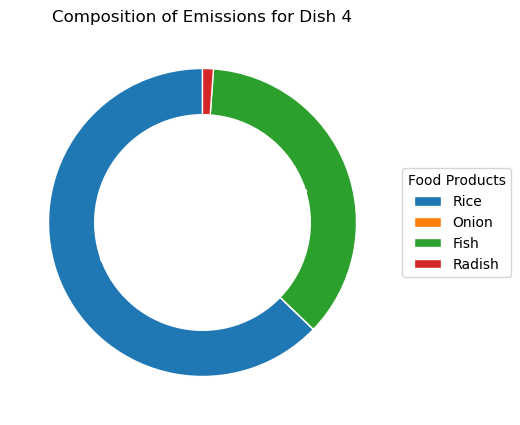

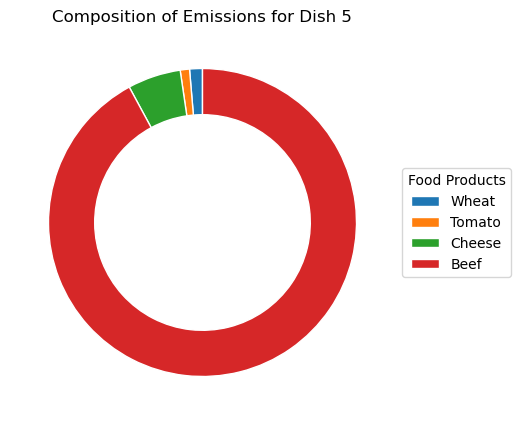

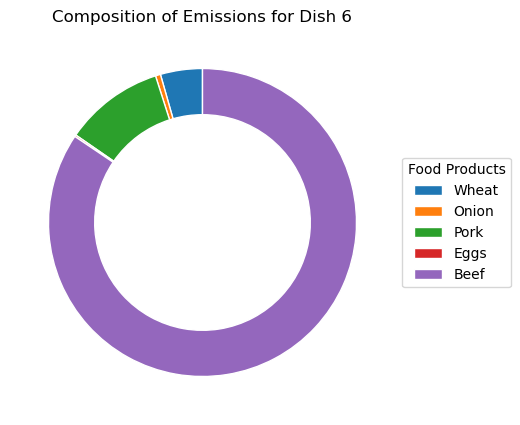

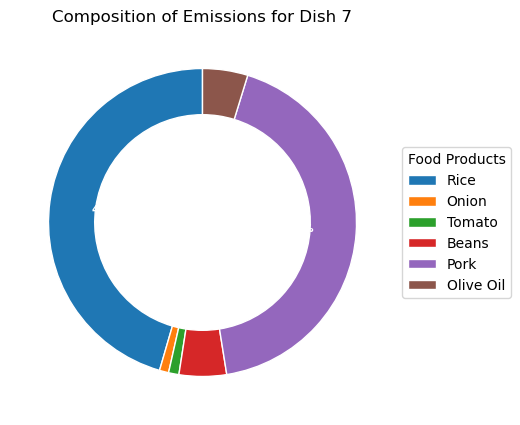

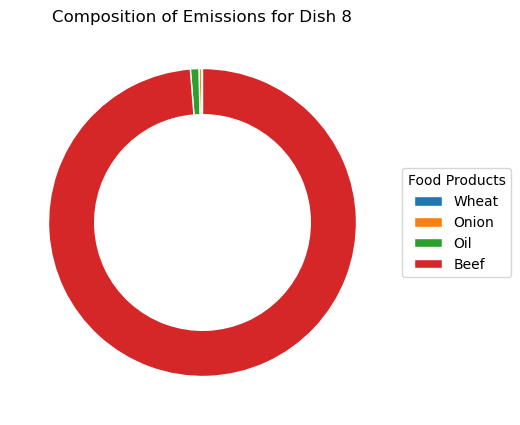

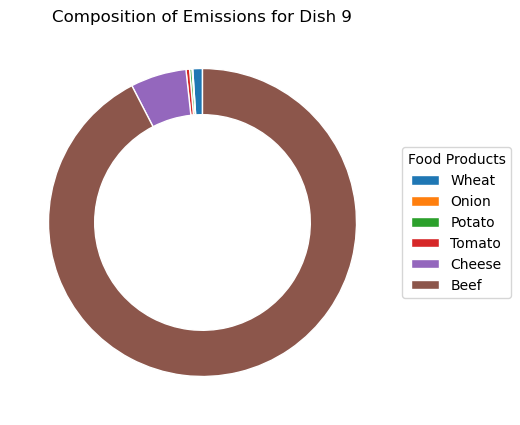

In [13]:
# Pie charts with proper spacing
for ind in final_df.index:
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)
    
    # Filter columns with quantity > 0 for pie chart
    filtered_data = final_df.iloc[ind][selected_columns_for_plot][final_df.iloc[ind][selected_columns_for_plot] > 0]
    
    wedges, texts, autotexts = ax.pie(
        filtered_data,
        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
        startangle=90,
        wedgeprops=dict(width=0.3, edgecolor='w'),  # Adjust the width for spacing
        textprops=dict(color="w"),
    )
    
    ax.legend(wedges, filtered_data.index, title="Food Products", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size=8, weight="bold")
    plt.title(f"Composition of Emissions for Dish {ind}")
    plt.show()


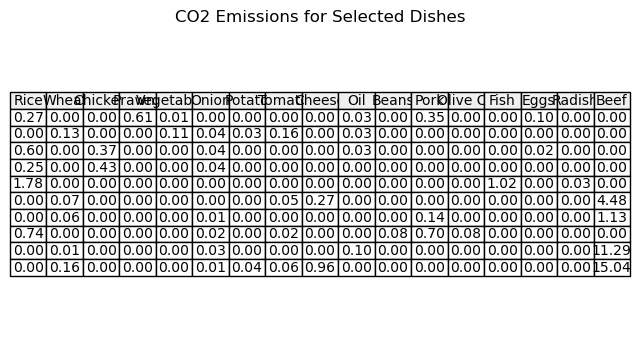

In [14]:
# Display table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table_data = final_df[selected_columns_for_plot].applymap(lambda x: f'{x:.2f}' if isinstance(x, float) else x)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center', colColours=['#f0f0f0']*len(table_data.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("CO2 Emissions for Selected Dishes")
plt.show()


In [16]:
import session_info
session_info.show()
